 # import libraries


        

In [62]:
import numpy as np  
import pandas as pd 
import os


In [63]:
  import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import seaborn as sns
from scipy.stats import linregress
from wordcloud import WordCloud, STOPWORDS
from PIL import Image




# Read the .csv file.

In [3]:
data = pd.read_csv("noon_perfumes_dataset.csv")

In [4]:
data

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk","Wild Rose, Elegant Jasmine",4.9,noon,4.2,98.1K
999,999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,"Woody-Floral, Sandalwood And Cedar",4.8,noon,4.2,98.1K
1000,1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",Ylang-ylang,4.7,Cute,3.7,1.9K
1001,1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5


# Show information about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1003 non-null   int64  
 1   brand               1003 non-null   object 
 2   name                1003 non-null   object 
 3   old_price           1003 non-null   float64
 4   new_price           1003 non-null   float64
 5   ml                  1003 non-null   int64  
 6   concentration       1003 non-null   object 
 7   department          1003 non-null   object 
 8   scents              1003 non-null   object 
 9   base_note           1003 non-null   object 
 10  middle_note         1003 non-null   object 
 11  item_rating         1003 non-null   float64
 12  seller              1003 non-null   object 
 13  seller_rating       1003 non-null   float64
 14  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 117.7+

# Exploring Data 

In [6]:
data.num_seller_ratings.describe() 



count      1003
unique       60
top       98.1K
freq        287
Name: num_seller_ratings, dtype: object

In [7]:
data.new_price.describe()  
  

count    1003.000000
mean      149.574307
std       108.686013
min         5.350000
25%        80.325000
50%       135.000000
75%       198.525000
max       904.850000
Name: new_price, dtype: float64

In [8]:
data.num_seller_ratings.describe()

count      1003
unique       60
top       98.1K
freq        287
Name: num_seller_ratings, dtype: object

In [9]:
data.old_price.mean()


321.17602193419737

In [10]:
data.new_price.value_counts()


140.00    8
95.00     7
115.00    7
126.00    6
110.00    6
         ..
119.95    1
886.00    1
83.70     1
94.15     1
10.60     1
Name: new_price, Length: 644, dtype: int64

 # checking types of all columns

In [65]:
data.dtypes 

brand                  string
name                   object
old_price             float64
new_price             float64
ml                      int64
concentration          object
department             string
scents                 object
base_note              object
middle_note            object
item_rating           float64
seller                 object
seller_rating         float64
num_seller_ratings     object
price_deduction       float64
%_of_deduction        float64
price_per_ml          float64
dtype: object

In [51]:
data['brand'] =data.brand.astype('string')
data.dtypes


brand                  string
name                   object
old_price             float64
new_price             float64
ml                      int64
concentration          object
department             object
scents                 object
base_note              object
middle_note            object
item_rating           float64
seller                 object
seller_rating         float64
num_seller_ratings     object
price_deduction       float64
%_of_deduction        float64
price_per_ml          float64
dtype: object

Visually inspect

In [52]:
data.head() 

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,150.45,38.09,2.45
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,307.05,73.99,2.16
2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,78.10,29.47,1.87
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,186.80,64.41,1.03
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,165.05,63.48,1.90


In [107]:
data.tail()

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
998,998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk","Wild Rose, Elegant Jasmine",4.9,noon,4.2,98.1K
999,999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,"Woody-Floral, Sandalwood And Cedar",4.8,noon,4.2,98.1K
1000,1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",Ylang-ylang,4.7,Cute,3.7,1.9K
1001,1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5
1002,1002,LACOSTE,L.12.12 Blanc-Pure,347.0,94.20,100,EDT,Men,Woody,"Virginia Cedar, Leather, Suede, Vetiver","Ylang-Ylang, Tuberose",4.6,noon,4.2,98.1K


Unique values in the Brand Data column

In [70]:
data.brand.unique()  

<StringArray>
[      'PACO RABANNE',    'Roberto Cavalli',         'S.T.Dupont',
              'GUESS',          'HUGO BOSS',  'DORALL COLLECTION',
              'GUCCI', 'Yves Saint Laurent',       'CERRUTI 1881',
       'Calvin Klein',
 ...
          'ST Dupont',   'STELLA MCCARTNEY',     'Mandarina Duck',
                'TRI',               'Gres',               'Niya',
   'Genie Collection',   'Elizabeth Taylor',            'Roberto',
              'JOVAN']
Length: 160, dtype: string

# Divide columns into two categories

In [11]:
cols_data = pd.DataFrame(data.dtypes)
num_cols = list(cols_data[cols_data[0]=='int64'].index)
cat_cols = list(cols_data[cols_data[0]=='object'].index)
print('Numeric variables includes:','\n',num_cols)
print('\nCategorical variables includes','\n',cat_cols)

Numeric variables includes: 
 ['Unnamed: 0', 'ml']

Categorical variables includes 
 ['brand', 'name', 'concentration', 'department', 'scents', 'base_note', 'middle_note', 'seller', 'num_seller_ratings']


# Data cleaning

In [12]:
data.isna()


,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Use .isna() result as data mask

In [110]:
data[data.name.isna()]

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings


Understand how the data looks like and determine whether there is an null.

In [53]:
print(data.shape)
print(data.isna().sum())   
data.head()

(1003, 17)
brand                 0
name                  0
old_price             0
new_price             0
ml                    0
concentration         0
department            0
scents                0
base_note             0
middle_note           0
item_rating           0
seller                0
seller_rating         0
num_seller_ratings    0
price_deduction       0
%_of_deduction        0
price_per_ml          0
dtype: int64


,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,150.45,38.09,2.45
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,307.05,73.99,2.16
2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,78.10,29.47,1.87
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,186.80,64.41,1.03
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,165.05,63.48,1.90


# drop a column

In [13]:
data.drop('Unnamed: 0',
         axis='columns', inplace=True)   


In [14]:
data

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K
2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk","Wild Rose, Elegant Jasmine",4.9,noon,4.2,98.1K
999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,"Woody-Floral, Sandalwood And Cedar",4.8,noon,4.2,98.1K
1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",Ylang-ylang,4.7,Cute,3.7,1.9K
1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5


# Add columns for the price deduction, deduction range, and price per ml.


In [16]:
data['price_deduction']=data['old_price']-data['new_price']
data['%_of_deduction']=((data['price_deduction']/data['old_price']).round(4))*100
data['price_per_ml']=(data['new_price']/data['ml']).round(2)


In [116]:
data

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,150.45,38.09,2.45
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,307.05,73.99,2.16
2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,78.10,29.47,1.87
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,186.80,64.41,1.03
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,165.05,63.48,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk","Wild Rose, Elegant Jasmine",4.9,noon,4.2,98.1K,95.00,55.88,0.75
999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,"Woody-Floral, Sandalwood And Cedar",4.8,noon,4.2,98.1K,224.25,59.33,1.54
1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",Ylang-ylang,4.7,Cute,3.7,1.9K,36.00,65.45,0.32
1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5,49.00,38.89,5.13


# Analyze


In [ ]:
#Determining the scope of the discount in relation to different sexual categories

In [71]:
men=data[data['department']=='Men']
women=data[data['department']=='Women']
unisex=data[data['department']=='Unisex']

In [72]:
avg_price_men=men['new_price'].mean() 
avg_discount_men=men['price_deduction'].mean() 
avg_price_men=men['new_price'].mean()
avg_discount_men=men['price_deduction'].mean()

In [73]:
avg_price_women=women['new_price'].mean()        
avg_discount_women=women['price_deduction'].mean() 
avg_price_women=women['new_price'].mean()
avg_discount_women=women['price_deduction'].mean()

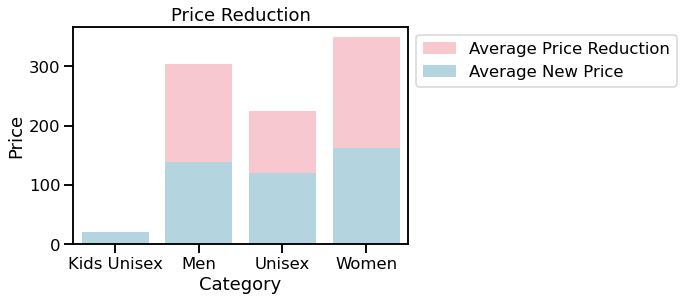

In [74]:
avg_old_price = data.groupby('department')['old_price'].mean().reset_index()
avg_new_price = data.groupby('department')['new_price'].mean().reset_index()
sns.barplot(x="department",  y="old_price", data=avg_old_price, color='pink', label='Average Price Reduction')   
sns.barplot(x="department", y="new_price", data=avg_new_price, color='lightblue', label='Average New Price') 
sns.set_context("talk")
plt.title('Price Reduction')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [ ]:
#From this histogram, it shows unisex perfume products are not as expensive as male and female ones.


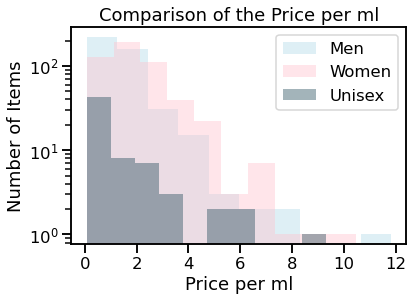

In [75]:
plt.hist(men['price_per_ml'], alpha=0.4, label='Men',color='lightblue', density=False)
plt.hist(women['price_per_ml'], alpha=0.4, label='Women',color='pink', density=False)
plt.hist(unisex['price_per_ml'], alpha=0.4, label='Unisex',color='#194553', density=False)
plt.yscale('log')
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.title('Comparison of the Price per ml')
plt.xlabel('Price per ml')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [78]:
men_base_str=men['base_note'].str.cat(sep=' ')
men_middle_str=men['middle_note'].str.cat(sep=' ')
men_str=men_base_str+men_middle_str
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
men_str_nopunc = ""
for word in men_str:
    if word not in punctuations:
        men_str_nopunc = men_str_nopunc + word
men_str_clean_and=men_str_nopunc.replace(' and ', '')
men_str_clean_And=men_str_clean_and.replace(' And ', '')
men_str_cleaned=men_str_clean_And.replace(' Notes ', '')

In [ ]:
#here demonstrates the top 10 scent notes,men

In [79]:
def word_count(str):
    counts = {}
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

men_note_lib=word_count(men_str_cleaned)
sort_men = sorted(men_note_lib.items(), key=lambda x: x[1], reverse=True)

#conver a dictionary to a dataframe
men_note_df=pd.DataFrame(men_note_lib.items(), columns=['base_note', 'frequency'])
men_note_df.sort_values('frequency', ascending=False).head(10)

,base_note,frequency
17,Cedar,120
11,Amber,120
14,Patchouli,116
13,Sandalwood,114
12,Musk,102
32,Vetiver,87
29,Tonka,80
301,Jasmine,70
30,Bean,66
434,Geranium,64


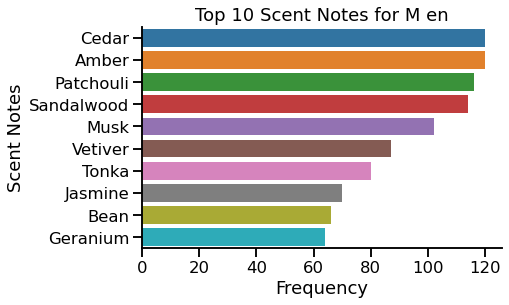

In [25]:
men_note_top10=men_note_df.sort_values('frequency', ascending=False).head(10)
sns.catplot(x='frequency', y='base_note', data=men_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for M en')
plt.xlabel('Frequency')
plt.ylabel('Scent Notes')
plt.show()

In [ ]:
#here demonstrates the top 10 scent notes,women


In [80]:
women_base_str=women['base_note'].str.cat(sep=' ')
women_middle_str=women['middle_note'].str.cat(sep=' ')
women_str=women_base_str+women_middle_str
women_str_nopunc = ""
for word in women_str:
    if word not in punctuations:
        women_str_nopunc = women_str_nopunc + word
women_str_clean_and=women_str_nopunc.replace(' and ', '')
women_str_clean_And=women_str_clean_and.replace(' And ', '')
women_str_cleaned=women_str_clean_And.replace(' Notes ', '')


#display the top 10 scent notes for women
women_note_lib=word_count(women_str_cleaned)
sort_women = sorted(women_note_lib.items(), key=lambda x: x[1], reverse=True)
women_note_df=pd.DataFrame(women_note_lib.items(), columns=['note', 'frequency'])
women_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
25,Jasmine,198
9,Musk,190
66,Rose,160
0,Vanilla,137
8,Sandalwood,128
16,Amber,124
12,Patchouli,91
124,Blossom,71
383,Orange,64
10,Cedar,62


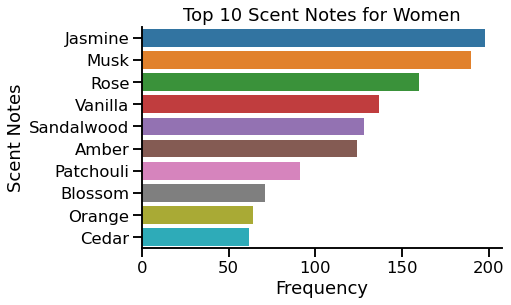

In [27]:
women_note_top10=women_note_df.sort_values('frequency', ascending=False).head(10)
sns.catplot(x='frequency', y='note', data=women_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Women')
plt.xlabel('Frequency')
plt.ylabel('Scent Notes')
plt.show()

In [ ]:
#here demonstrates the top 10 scent notes,unisex


In [28]:
unisex_base_str=unisex['base_note'].str.cat(sep=' ')
unisex_middle_str=unisex['middle_note'].str.cat(sep=' ')
unisex_str=unisex_base_str+unisex_middle_str
unisex_str_nopunc = ""
for word in unisex_str:
    if word not in punctuations:
         unisex_str_nopunc = unisex_str_nopunc + word
unisex_str_clean_and=unisex_str_nopunc.replace(' and ', '')
unisex_str_clean_And=unisex_str_clean_and.replace(' And ', '')
unisex_str_cleaned=unisex_str_clean_And.replace(' Notes ', '')

#display the top 10 scent notes for unisex
unisex_note_lib=word_count(unisex_str_cleaned)
sort_unisex = sorted(unisex_note_lib.items(), key=lambda x: x[1], reverse=True)
unisex_note_df=pd.DataFrame(unisex_note_lib.items(), columns=['note', 'frequency'])
unisex_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
5,Amber,25
8,Musk,22
68,Rose,14
15,Sandalwood,14
9,Vanilla,14
104,Jasmine,13
21,Patchouli,12
22,Cedar,9
4,Wood,9
49,Woody,6


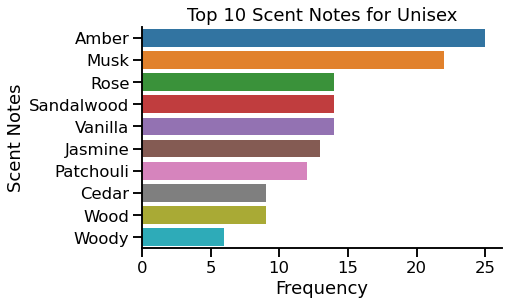

In [153]:
unisex_note_top10=unisex_note_df.sort_values('frequency', ascending=False).head(10)
sns.catplot(x='frequency', y='note', data=unisex_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Unisex')
plt.xlabel('Frequency')
plt.ylabel('Scent Notes')
plt.show()

سويت قروب باي للبراند والتقييمات العالية عليهاخليتها راندم

In [30]:
du=data.groupby('brand')[['item_rating']].max().sort_values(by='item_rating',ascending=False).sample(25)
du

,item_rating
brand,
ANGEL SCHLESSER,4.6
TRUSSARDI,5.0
COACH,5.0
YSL,5.0
GUCCI,5.0
NARCISO RODRIGUEZ,5.0
Misk Perfumes,3.8
TED LAPIDUS,5.0
Calvin Klein,5.0


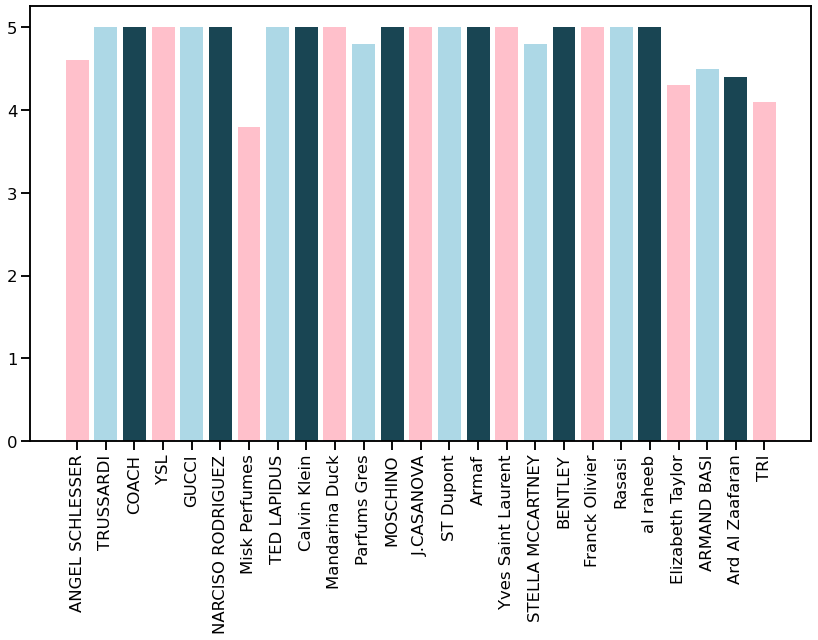

In [102]:
plt.figure(figsize=[14,8])
plt.bar(du.index,du.item_rating,color=['pink','lightblue','#194553'])
plt.xticks(rotation=90);
plt.show()

       

In [ ]:
#From scatter charts, it demonstrates more women perfumes still get 4-5 star reviews, althoght the price is slightly higher.


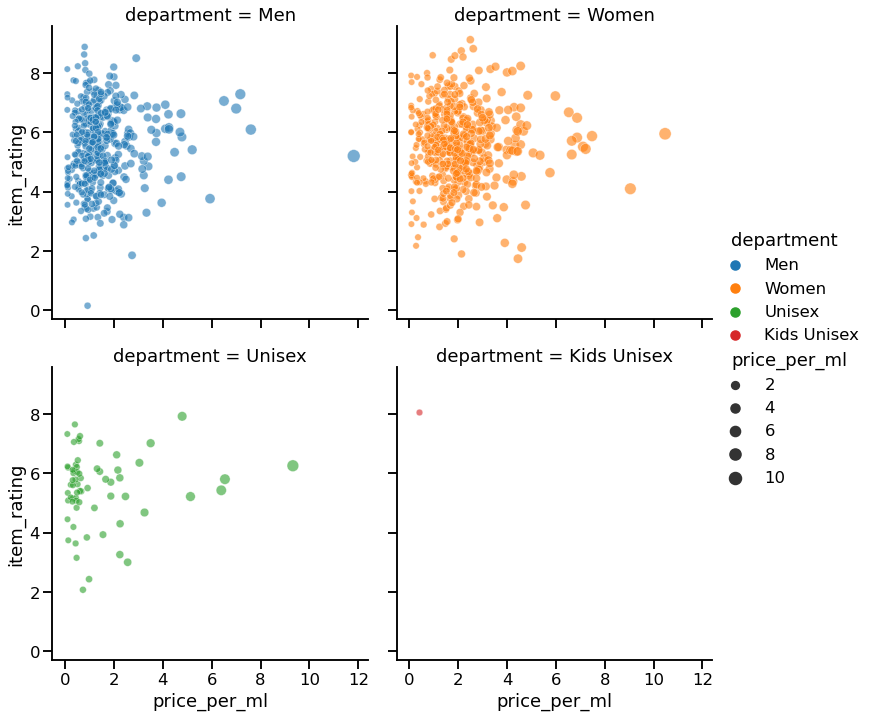

In [104]:
rate_jitter=data['item_rating']+np.random.normal(1,1.1,size=len(data))
sns.relplot(x=data['price_per_ml'], y=rate_jitter, kind='scatter', hue=data['department'], alpha=0.6, size=data['price_per_ml'], col=data['department'], col_wrap=2 ,color='pink')
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.show()

In [ ]:
#From the chart below, it tells us that there is a trend that a product at a higher price may result in a better rating.

In [103]:
#Men's perfume evaluation

In [142]:
regression=linregress(men['price_per_ml'], men['item_rating'])
print(regression)

LinregressResult(slope=0.05301151715837076, intercept=4.384705988951069, rvalue=0.107108648652559, pvalue=0.025829951995361783, stderr=0.023702900228221968, intercept_stderr=0.045291368181624596)


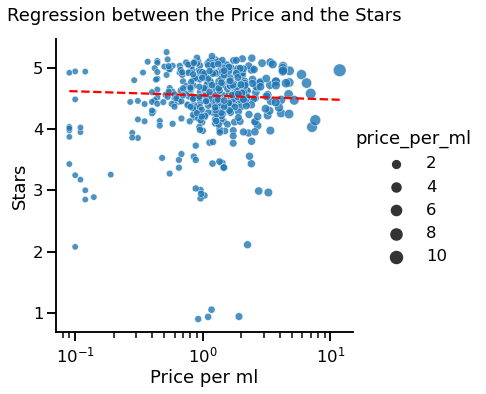

In [155]:
fx=np.array([men['price_per_ml'].min(), men['price_per_ml'].max()])
fy=regression.intercept+regression.slope*fx
rate_jitter_men=men['item_rating']+np.random.normal(0,0.1,size=len(men))
sns.relplot(x=men['price_per_ml'], y=rate_jitter_men, kind='scatter', alpha=0.8, size=men['price_per_ml'])
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.plot(fx, fy, '--', color='red')
plt.xscale("log")
plt.title('Regression between the Price and the Stars', y=1.04)
plt.xlabel('Price per ml')
plt.ylabel('Stars')
plt.show()

In [ ]:
#Women's perfume evaluation

In [144]:
regression=linregress(women['price_per_ml'], women['item_rating'])
print(regression)

LinregressResult(slope=-0.012048170007047521, intercept=4.620821290936539, rvalue=-0.03291359466564266, pvalue=0.46140335213882044, stderr=0.016345249098577735, intercept_stderr=0.03992982374672849)


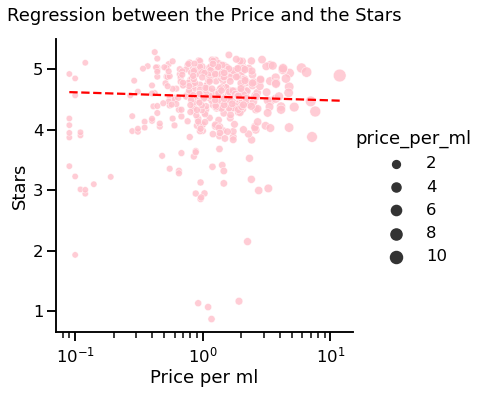

In [154]:
fx=np.array([men['price_per_ml'].min(), men['price_per_ml'].max()])
fy=regression.intercept+regression.slope*fx
rate_jitter_men=men['item_rating']+np.random.normal(0,0.1,size=len(men))
sns.relplot(x=men['price_per_ml'], y=rate_jitter_men, kind='scatter', alpha=0.8,color='pink', size=men['price_per_ml'])
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.plot(fx, fy, '--', color='red')
plt.xscale("log")
plt.title('Regression between the Price and the Stars', y=1.04)
plt.xlabel('Price per ml')
plt.ylabel('Stars')
plt.show()